In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Generate The Synthetic DataSet 

In [20]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, 
                           n_informative=1, n_redundant=0,  n_clusters_per_class=1,random_state=41, 
                           hypercube=False, class_sep=10)

## Visualize the dataset


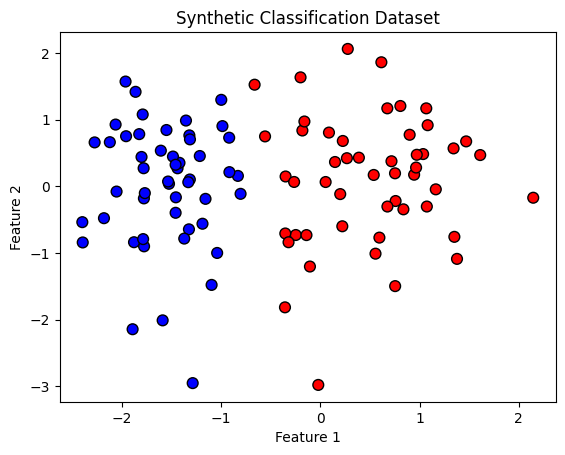

In [21]:
# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=60)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Classification Dataset')
plt.show()


## Implementing Perceptron Trick 

In [26]:
def perceptron (X, y):
    X=np.insert(X, 0, 1 , axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    epochs =100
    for i in range (epochs):
        point = np.random.randint(0,100)
        eq=np.dot(X[point],weights)
        y_pred = check(eq)
        weights = weights +(lr*(y[point]-y_pred)*X[point])

    return weights[0],weights[1:]

In [27]:
def check(x):
    return 1 if x>=0 else 0

In [28]:
intercept_,coef_= perceptron(X,y)

In [31]:
print(f"The Intercept is : {intercept_}")
print(f"The Coefficients are : {coef_}")

The Intercept is : 0.9
The Coefficients are : [1.37068916 0.12544508]


In [36]:
m= -(coef_[0]/coef_[1])
b= -(intercept_/coef_[1])


**Ax+By+C=0  --> m= -A/B  --> b= -C/B**


In [44]:
print (f"The Value of m is {m} ")
print(f"And The Value of b is {b}")

The Value of m is -10.926607282767499 
And The Value of b is -7.174454188497696


In [46]:
x_input = np.linspace(-5,5,100)
y_input = m * x_input + b

(-5.0, 4.0)

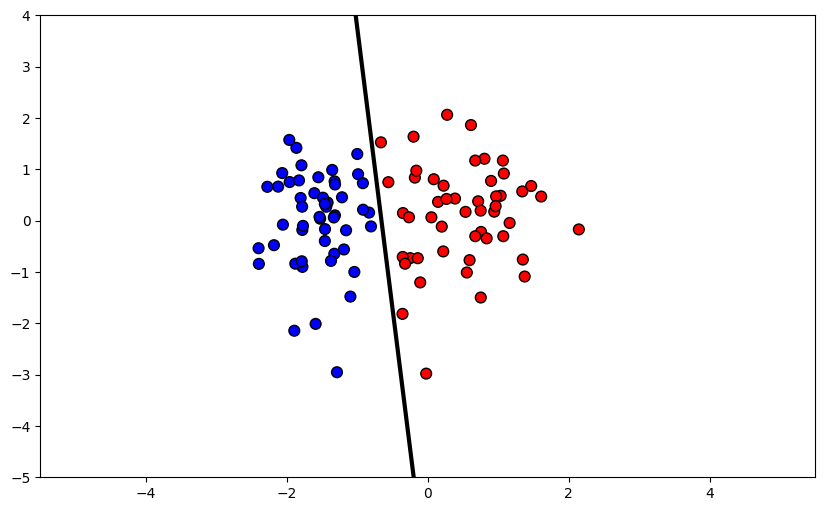

In [54]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr',s=60,edgecolor='k')
plt.ylim(-5,4)


In [55]:
def perceptron (X, y):
    m=[]
    b=[]
    
    X=np.insert(X, 0, 1 , axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    epochs =100
    
    for i in range (epochs):
        point = np.random.randint(0,100)
        eq=np.dot(X[point],weights)
        y_pred = check(eq)
        weights = weights +(lr*(y[point]-y_pred)*X[point])

        mi= -(coef_[0]/coef_[1])
        bi= -(intercept_/coef_[1])
        m.append(mi)
        b.append(bi)

    return m,b

In [56]:
m,b = perceptron(X,y)

In [58]:
print(m)
print(b)

[-10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.926607282767499, -10.92660728

In [62]:
!pip install ipympl
!pip install nodejs-bin
!jupyter labextension install @jupyter-widgets/jupyterlab-manager
!jupyter labextension install jupyter-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 2.4 MB/s eta 0:00:0000:0100:01
(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 
[W 2024-11-05 09:58:16.849 LabApp] 'kernel_spec_manager_class' has moved from NotebookApp to ServerApp. This config will be passed to ServerApp. Be sure to update your config before our next release.
Building jupyterlab assets (production, minimized)
The extension "@jupyterlab/git" is outdated.

The extension "nbdime-jupyterlab" is outdated.

The extension "beatrix_jupyterlab" is outdated.

(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage preb

In [65]:

%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [66]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

<IPython.core.display.Javascript object>

/opt/conda/lib/python3.10/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [68]:
from sklearn.linear_model import LogisticRegression 
log = LogisticRegression()
log.fit(X,y)

LogisticRegression()

In [75]:
m = -(log.coef_[0][0]/log.coef_[0][1])
b = -(log.intercept_/log.coef_[0][1])

In [76]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

In [77]:
plt.figure(figsize=(10,6))
plt.plot(x_input , y_input , color = 'black', linewidth= 3)
plt.scatter(X[:,0], X[:,1], c= y, cmap = 'bwr', edgecolor= 'k', s= 60 )
plt.ylim(-3,2)


<IPython.core.display.Javascript object>